# Submission Pertama : Menyelesaikan Permasalahan Departemen HR Perusahaan Jaya Jaya Maju



* Nama : Abrar Argya Adana
* Email : abrar.argya7012@gmail.com
* id Dicoding :B25B9D045

### Persiapan

### Menyiapkan library yang dibutuhkan

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
import xgboost as xgb
from sklearn.metrics import classification_report, recall_score, accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

### Menyiapkan data yang akan digunakan

In [3]:
df = pd.read_csv('./data/employee_data.csv')

## Data Understanding

Melihat data teratas dari dataset

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Pada dataset tersebut, terdapat kolom : 
1. EmployeeId : id karyawan bersifat unik
2. Age : umur karyawan
3. Attrition : data karyawan keluar atau tidak (yes : 1, no : 0)
4. BusinessTravel : komitmen perjalanan bisnisl 
5. DailyRate : gaji per hari (fixed)
6. Department : departemen karyawan
7. DistanceFromHome : jarak karyawan dari rumah ke kantor (km)
8. Education : 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
9. EducationField : Bidang edukasi
10. EnvironmentSatisfaction : Kepuasan lingkungan kerja (1-Low, 2-Medium, 3-High, 4-Very High)
11. Gender : gender karyawan
12. HourlyRate :  gaji perjam
13. JobInvolvement : partisipasi kerja; sejauh mana karyawan mengenali pekerjaan mereka (1-Low, 2-Medium, 3-High, 4-Very High)
14. JobLevel : tingkat pekerjaan (1 sampai 5)
15. JobRole : peran/nama pekerjaan
16. JobSatisfaction : tingkat kepuasan pekerjaan ( 1-Low, 2-Medium, 3-High, 4-Very High)
17. MaritalStatus :  status pernikahan
18. MonthlyIncome : gaji perbulan (berbagai sumber seperti gaji, bonus, atau bisnis)
19. MonthlyRate :  tarif bulanan (tetap)
20. NumCompaniesWorked : jumlah perusahaan karyawan bekerja
21. Over18 : apakah diatas umur 18 tahun?
22. OverTime : apakah lembur?
23. PercentSalaryHike : presentase kenaikan gaji tahun lalu
24. PerformanceRating : rasio performa karyawan (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
25. RelationshipSatisfaction : kepuasan hubungan kerja (1-Low, 2-Medium, 3-High, 4-Very High)
26. StandardHours : jam kerja standar
27. StockOptionLevel : tingkat opsi pembelian saham perusahaan
28. TotalWorkingYears : total pengalaman kerja profesional seseorang di seluruh perusahaan selama karir mereka
29. TrainingTimesLastYear : jumlah mengikuti pelatihan tahun lalu
30. WorkLifeBalance : keseimbangan kerja (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
31. YearsAtCompany : masa kerja di satu perusahaan tempat mereka bekerja saat ini
32. YearsInCurrentRole :  tahun bekerja di role saat ini
33. YearsSinceLastPromotion : jumlah tahun sejak promosi terakhir
34. YearsWithCurrManager : jumlah tahun sejak dengan manager sekarang ini

Cek tipe data dan jumlah data

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   str    
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   str    
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   str    
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   str    
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel           

Terdapat missing values di kolom 'Attrition' sejumlah 412 data

**Cek jumlah duplikat :** 

In [6]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat di dataset ini.

**Ringkasan Dataset :**
1. Terdapat 1470 baris dan 35 kolom
2. Kolom 'Attrition' memiliki 412 missing values
3. Tidak ada duplikat data pada dataset

**Cleaning Data**

Cek unique value di seluruh kolom

In [7]:
# Melihat jumlah nilai unik di setiap kolom
pd.set_option('display.max_rows', None) # Agar semua kolom terlihat
print(df.nunique())

EmployeeId                  1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

kolom EmployeeCount , Over18, dan StandardHours memiliki nilai yang sama di seluruh kolomnya. Ini berarti kolomnya tidak memberikan informasi signifikan baik untuk EDA maupun modeling. Drop kolom ini untuk efektifitas.

In [8]:
# Kolom ini tidak berguna untuk dashboard maupun model
cols_to_drop = ['StandardHours', 'Over18', 'EmployeeCount'] 

# Cek dulu apakah kolomnya agar tidak error
cols_present = [c for c in cols_to_drop if c in df.columns]
df.drop(cols_present, axis=1, inplace=True)

Kita perlu drop value di kolom 'Attrition' karena kita tidak ingin memberikan data pembelajaran yang salah (asumsi) ke model. Namun, dibandingkan drop values dan kehilangan 28% data lebih baik split training dan test disini saja. Attrition yang valuenya NaN akan menjadi data test untuk prediksi model dan attrition yang ada valuenya akan digunakan untuk EDA dan modeling.

**Note Penting**

data_test bukan digunakan untuk test performa model di modeling, tapi digunakan untuk kasus asli setelah model dideploy

In [9]:
#Pisahkan data yang label Attrition-nya KOSONG (untuk diprediksi nanti)
data_test = df[df['Attrition'].isnull()]

# Ambil data yang label Attrition-nya ada (untuk EDA dan melatih model)
data_train = df.dropna(subset=['Attrition'])

# Cek ukuran data
print(f"Jumlah data untuk training model: {data_train.shape[0]}") 
print(f"Jumlah data untuk prediksi akhir: {data_test.shape[0]}") 

Jumlah data untuk training model: 1058
Jumlah data untuk prediksi akhir: 412


**Exploratory Data Analysis**

Business Questions: 
* Faktor Beban Kerja & Kepuasan
1. Bagaimana kecenderungan karyawan yang bekerja lembur (OverTime) terhadap attrition?
2. Bagaimana pengaruh jarak rumah (DistanceFromHome) terhadap keputusan karyawan untuk keluar?
3. Bagaimana kepuasan lingkungan (EnvironmentSatisfaction) dan kepuasan kerja (JobSatisfaction) memicu karyawan untuk keluar?
* Faktor Kompensasi & Pendapatan
4. Bagaimana pengaruh penghasilan bulanan (MonthlyIncome) terhadap attrition?
* Faktor Pengembangan Karir
5. Bagaimana hubungan antara lama bekerja dengan manajer saat ini (YearsWithCurrManager) dengan tingkat attrition?
* Profil Demografi
6. Kelompok usia (Age) berapa yang paling banyak melakukan attrition? (Apakah Gen-Z atau karyawan senior?)
7. Bagaimana pola status pernikahan (MaritalStatus) terhadap keputusan keluar (attrition) ?

Cek lagi head dataframe yang akan digunakan untuk EDA (data_to_predict)

In [10]:
data_train.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,...,3,4,1,24,2,3,5,2,1,4


**1. Bagaimana kecenderungan karyawan yang bekerja lembur (OverTime) terhadap attrition?**

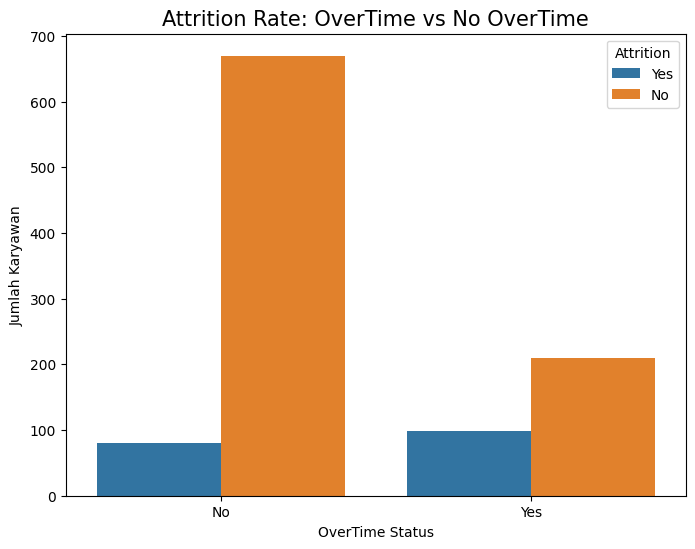

Nama Kolom: Index(['No', 'Yes'], dtype='str', name='Attrition_Label')
Attrition_Label   No  Yes  Attrition_Rate
OverTime                                 
No               670   81       10.785619
Yes              209   98       31.921824


In [11]:
# Mapping legenda attrition agar Data Lebih Manusiawi (Yes/No)
label_map = {1.0: 'Yes', 0.0: 'No'}
data_train['Attrition_Label'] = data_train['Attrition'].map(label_map)


# Visualisasi OverTime vs Attrition
plt.figure(figsize=(8, 6))

# Perhatikan: x='OverTime', hue='Attrition_Label' (pakai kolom yang baru kita buat)
sns.countplot(data=data_train, x='OverTime', hue='Attrition_Label')

plt.title('Attrition Rate: OverTime vs No OverTime', fontsize=15)
plt.xlabel('OverTime Status')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Hitung presentase attrition berdasarkan OverTime
# Gunakan Crosstab pada kolom label agar rapi
overtime_attrition = pd.crosstab(data_train['OverTime'], data_train['Attrition_Label'])

# Cek nama kolom (sekarang pasti 'Yes' dan 'No')
print("Nama Kolom:", overtime_attrition.columns)

# Hitung Rate
# Rumus: Yes / (Yes + No)
overtime_attrition['Attrition_Rate'] = (overtime_attrition['Yes'] / 
                                        (overtime_attrition['Yes'] + overtime_attrition['No'])) * 100

print(overtime_attrition)

Terdapat korelasi kuat antara Lembur dan Attrition.  Karyawan yang cenderung bekerja lembur (overtime) memiliki presentase attrition rate yang lebih tinggi tiga kali lipat (31.92%) dibandingkan dengan karyawan yang cenderung tidak bekerja lembur (10.78%).

**2. Bagaimana pengaruh jarak rumah (DistanceFromHome) terhadap keputusan karyawan untuk keluar?**

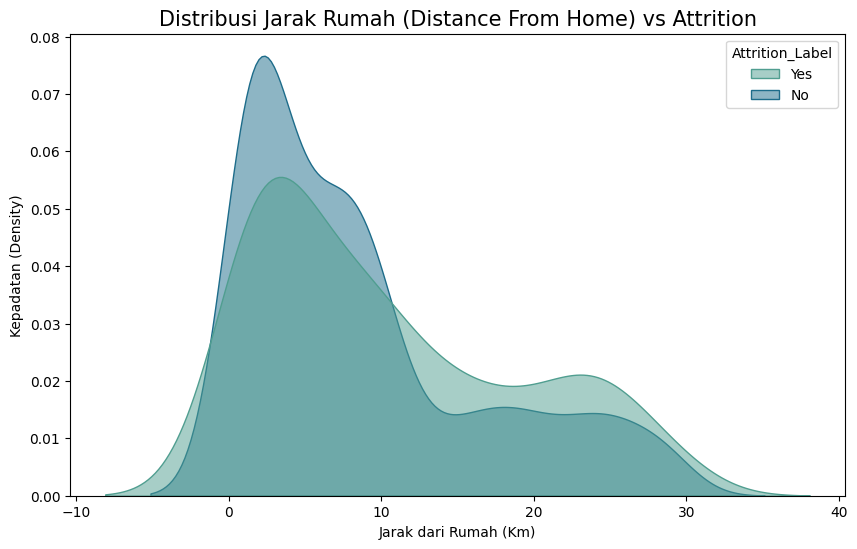

Rata-rata jarak karyawan yang Keluar (Yes): 10.368715083798882
Rata-rata jarak karyawan yang Bertahan (No): 8.695108077360636


In [12]:
plt.figure(figsize=(10, 6))

# Menggunakan KDE Plot untuk melihat kepadatan distribusi
sns.kdeplot(
    data=data_train, 
    x='DistanceFromHome', 
    hue='Attrition_Label', 
    fill=True,
    common_norm=False,  # agar luas area Yes dan No dinormalisasi masing-masing (tidak mengecil karena jumlah data Yes sedikit)
    palette='crest',
    alpha=0.5
)

plt.title('Distribusi Jarak Rumah (Distance From Home) vs Attrition', fontsize=15)
plt.xlabel('Jarak dari Rumah (Km)')
plt.ylabel('Kepadatan (Density)')
plt.show()

# Cek Rata-ratanya dengan Angka
print("Rata-rata jarak karyawan yang Keluar (Yes):", 
      data_train[data_train['Attrition_Label'] == 'Yes']['DistanceFromHome'].mean())
print("Rata-rata jarak karyawan yang Bertahan (No):", 
      data_train[data_train['Attrition_Label'] == 'No']['DistanceFromHome'].mean())

Puncak attrition yes dan no berada di range yang relatif sama. Rata - rata jarak karyawan yang keluar dan bertahan juga tidak beda jauh.Ini berarti jarak rumah ke kantor bukan menjadi alasan attrition.

**3. Bagaimana kepuasan lingkungan (EnvironmentSatisfaction) dan kepuasan kerja (JobSatisfaction) memicu karyawan untuk keluar?**

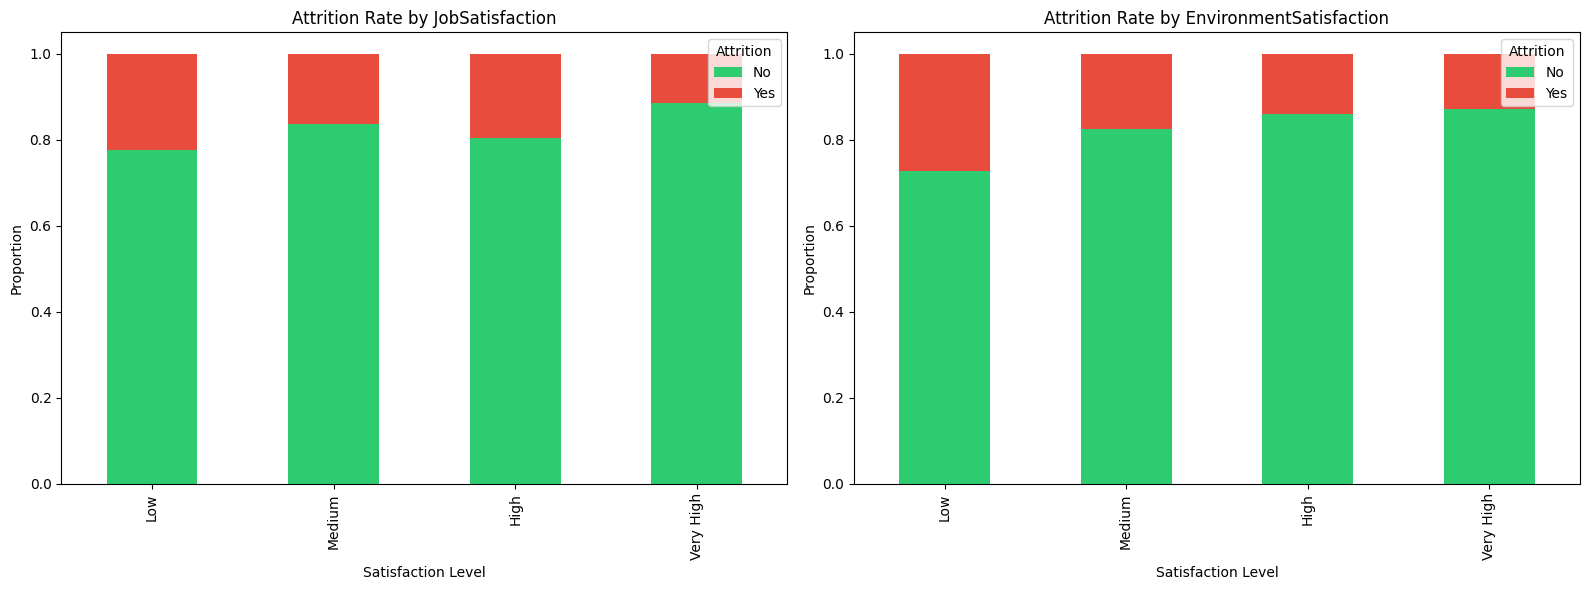

In [13]:
# List kolom kepuasan yang mau dicek
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction']

# Mapping label agar grafik mudah dipahami
sat_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, col in enumerate(satisfaction_cols):
    # Buat Crosstab
    # Normalize='index' akan mengubah angka jadi persentase (0-1) per baris
    ct = pd.crosstab(data_train[col].map(sat_map), data_train['Attrition_Label'], normalize='index')
    
    # Urutkan index agar rapi (Low -> Very High)
    order = ['Low', 'Medium', 'High', 'Very High']
    ct = ct.reindex(order)
    
    # Plot Stacked Bar
    ct.plot(kind='bar', stacked=True, ax=axes[i], color=['#2ecc71', '#e74c3c']) # Hijau (No), Merah (Yes)
    
    axes[i].set_title(f'Attrition Rate by {col}')
    axes[i].set_xlabel('Satisfaction Level')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

* Pada 'JobSatisfaction'(Kepuasan pekerjaan), karyawan yang memiliki kepuasan rendah (low) memiliki rasio attrition lebih tinggi (lebih dari 20%) dibandingkan dengan karyawan yang memiliki kepuasan sangat tinggi. Pola menarik terlihat pada peningkatan rasio attrition pada karyawan yang memiliki kepuasan tinggi (high).

* Pada 'EnvironmentSatisfaction' (Kepuasan lingkungan), pola terlihat sangat jelas bahwa makin kecil kepuasan karyawan terhadap lingkungan kerjanya, makin tinggi attrition ratenya. Karyawan dengan kepuasan rendah memiliki attrition rate lebih dari 20%.

**4. Bagaimana pengaruh penghasilan bulanan (MonthlyIncome) terhadap attrition?**

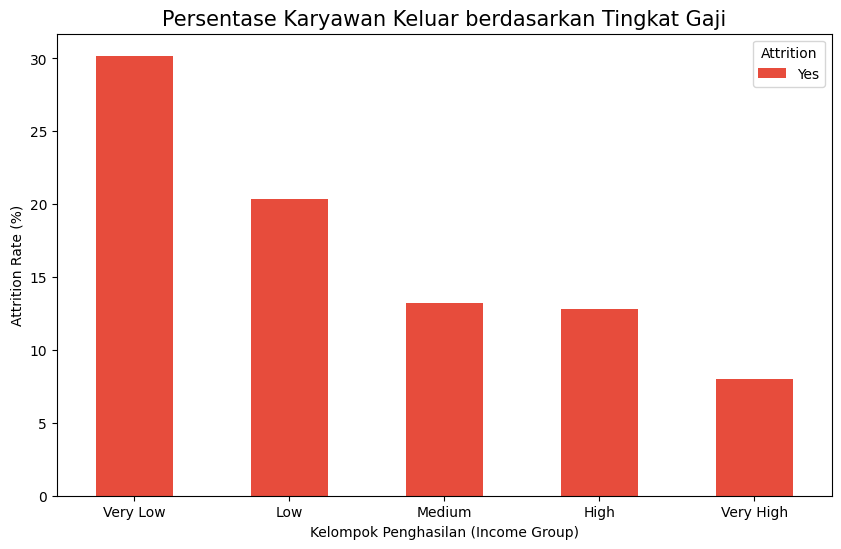

Attrition_Label         No        Yes
Income_Group                         
Very Low         69.811321  30.188679
Low              79.620853  20.379147
Medium           86.792453  13.207547
High             87.203791  12.796209
Very High        91.981132   8.018868


In [14]:
# Membuat Binning Gaji
# Bagi menjadi 5 kelompok berdasarkan kuantil (Low -> Very High)
data_train['Income_Group'] = pd.qcut(data_train['MonthlyIncome'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Hitung Attrition Rate per Group
income_attrition = pd.crosstab(data_train['Income_Group'], data_train['Attrition_Label'], normalize='index') * 100

# Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
income_attrition['Yes'].plot(kind='bar', color='#e74c3c') # plot karyawan keluar (Yes)
plt.title('Persentase Karyawan Keluar berdasarkan Tingkat Gaji', fontsize=15)
plt.legend(title='Attrition', loc='upper right')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Kelompok Penghasilan (Income Group)')
plt.xticks(rotation=0)
plt.show()

# Lihat angkanya
print(income_attrition)

Berdasarkan visualisasi di atas, karyawan dengan pendapatan bulanan terendah (very low) memiliki attrition rate tertinggi (30.18%). Angka ini memiliki tren menurun seiring pendapatan karyawan meningkat (20,39%, 20,37%, 13,20%, 12,79%, dan 8,01% berturut turut). Hal ini mengindikasikan bahwa pendapatan bulanan menjadi faktor penyebab attrition.

**5. Bagaimana hubungan antara lama bekerja dengan manajer saat ini (YearsWithCurrManager) dengan tingkat attrition?**

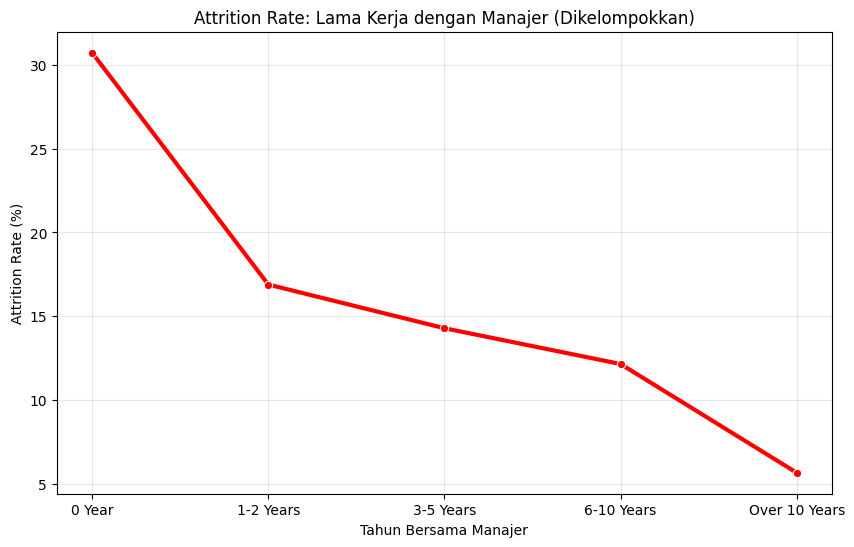

In [15]:
# Binning
# Kelompokkan: 0, 1, 2, 3, 4, 5-9, 10+
def group_years(years):
    if years == 0:
        return '0 Year'
    elif years <= 2:
        return '1-2 Years'
    elif years <= 5:
        return '3-5 Years'
    elif years <= 10:
        return '6-10 Years'
    else:
        return 'Over 10 Years'

# Terapkan fungsi ke data
data_train['Manager_Tenure_Group'] = data_train['YearsWithCurrManager'].apply(group_years)

# Atur urutan agar grafik tidak berantakan
order_list = ['0 Year', '1-2 Years', '3-5 Years', '6-10 Years', 'Over 10 Years']

# Hitung Ulang Persentase
grouped_attrition = pd.crosstab(data_train['Manager_Tenure_Group'], data_train['Attrition_Label'], normalize='index') * 100

# Reindex agar urutannya sesuai
grouped_attrition = grouped_attrition.reindex(order_list)

# Plot Ulang (Bar Chart lebih cocok untuk kategori grup)
plt.figure(figsize=(10, 6))

# Plot garis atau bar
sns.lineplot(data=grouped_attrition, x=grouped_attrition.index, y='Yes', marker='o', color='red', linewidth=3)
plt.title('Attrition Rate: Lama Kerja dengan Manajer (Dikelompokkan)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Tahun Bersama Manajer')
plt.grid(True, alpha=0.3)
plt.show()

Berdasarkan grafik di atas, tahun 0 menjadi tahun rawan karyawan keluar kerja berdasarkan lamanya bekerja bersama manajer (lebih dari 30%). Hal ini mengindikasikan perlunya evaluasi terhadap kecocokan penempatan dan efektivitas manajer dalam mengelola anggota tim baru

**6. Kelompok usia (Age) berapa yang paling banyak melakukan attrition? (Apakah Gen-Z atau karyawan senior?)**

C:\Users\ACER\AppData\Local\Temp\ipykernel_28288\3165753293.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_attrition.index, y=age_attrition['Yes'], palette='rocket')


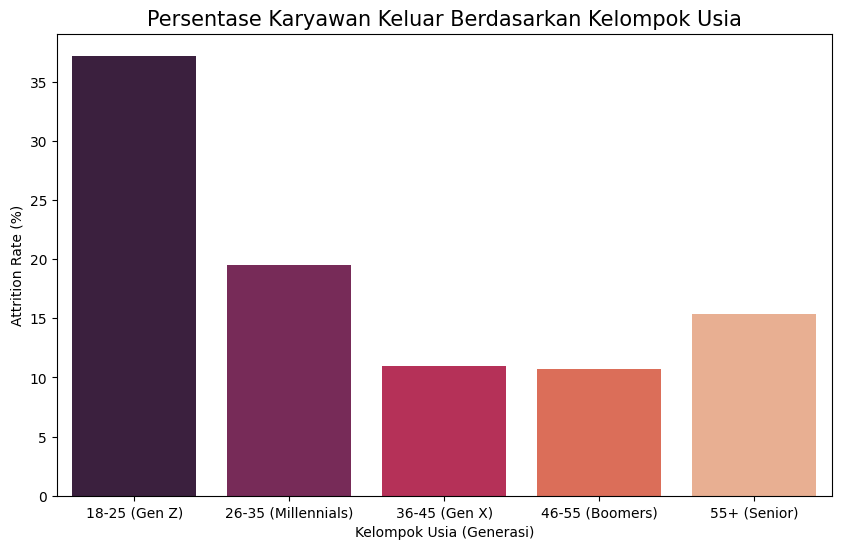

Attrition_Label             No        Yes
Age_Group                                
18-25 (Gen Z)        62.790698  37.209302
26-35 (Millennials)  80.510441  19.489559
36-45 (Gen X)        89.024390  10.975610
46-55 (Boomers)      89.285714  10.714286
55+ (Senior)         84.615385  15.384615


In [16]:
# Buat Kelompok Umur (Binning)
# Kita potong data umur menjadi kategori generasi
age_bins = [18, 25, 35, 45, 55, 60]
age_labels = ['18-25 (Gen Z)', '26-35 (Millennials)', '36-45 (Gen X)', '46-55 (Boomers)', '55+ (Senior)']

# Menggunakan pd.cut untuk membuat kolom baru
data_train['Age_Group'] = pd.cut(data_train['Age'], bins=age_bins, labels=age_labels, right=True)

# Hitung Persentase Attrition per Grup
age_attrition = pd.crosstab(data_train['Age_Group'], data_train['Attrition_Label'], normalize='index') * 100

# Visualisasi
plt.figure(figsize=(10, 6))

# Plot bar chart khusus untuk yang 'Yes' (Keluar)
sns.barplot(x=age_attrition.index, y=age_attrition['Yes'], palette='rocket')

plt.title('Persentase Karyawan Keluar Berdasarkan Kelompok Usia', fontsize=15)
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Kelompok Usia (Generasi)')
plt.show()

# Print angkanya agar detail
print(age_attrition)

Berdasarkan grafik di atas, attrition rate tertinggi berada di kalangan gen z (18-25 tahun) dengan angka 37.20%. Angka ini terus menurun seiring kelompok umur lebih tua dan meningkat lagi di kalangan senior (55+ tahun). Hal ini mengindikasikan perusahaan perlu membuat program pengembangan diri (mentorship) atau gamification agar Gen Z merasa tertantang dan betah.

**7. Bagaimana pola status pernikahan (MaritalStatus) terhadap keputusan keluar (attrition) ?**

C:\Users\ACER\AppData\Local\Temp\ipykernel_28288\4271458621.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


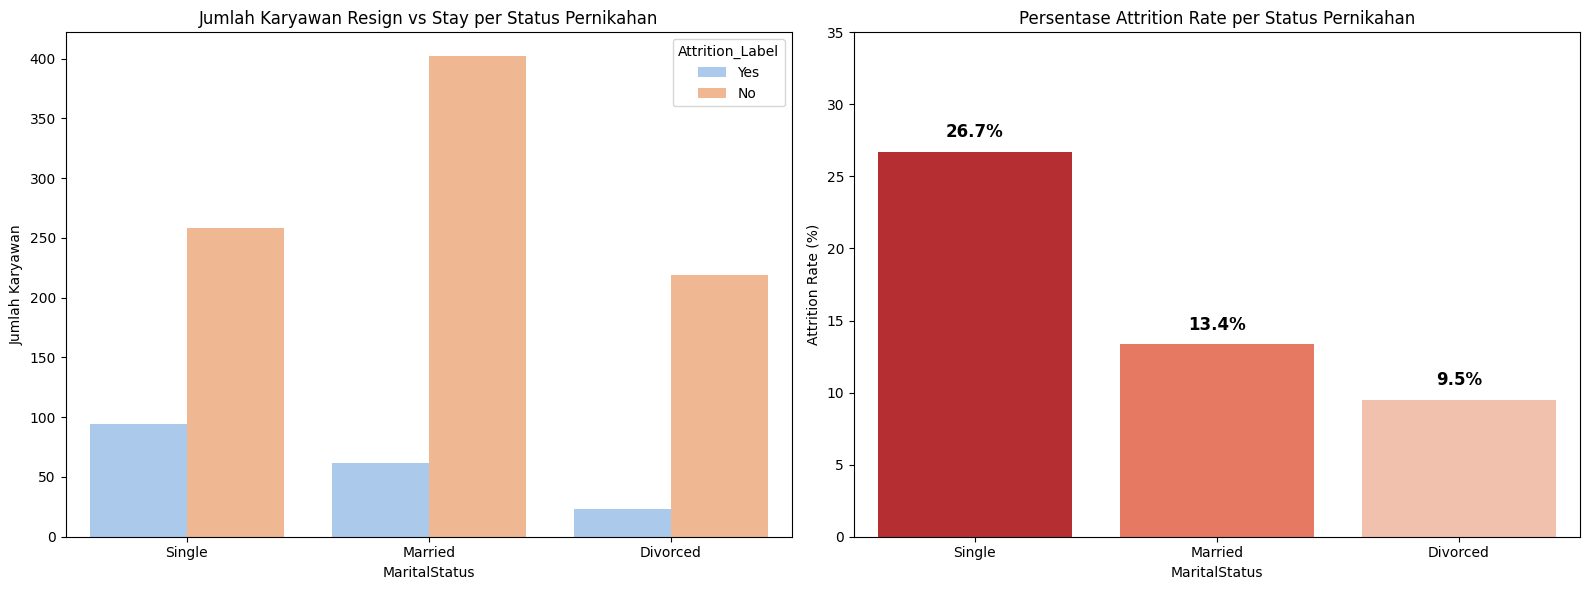

Attrition_Label         No        Yes
MaritalStatus                        
Single           73.295455  26.704545
Married          86.637931  13.362069
Divorced         90.495868   9.504132


In [17]:
# Set ukuran canvas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- BAGIAN 1: VISUALISASI JUMLAH (Countplot) ---
sns.countplot(
    data=data_train, 
    x='MaritalStatus', 
    hue='Attrition_Label', 
    palette='pastel',
    order=['Single', 'Married', 'Divorced'], # Kita urutkan agar rapi
    ax=axes[0]
)
axes[0].set_title('Jumlah Karyawan Resign vs Stay per Status Pernikahan')
axes[0].set_ylabel('Jumlah Karyawan')


# Hitung presentase attrition berdasarkan Marital Status
marital_attrition = pd.crosstab(data_train['MaritalStatus'], data_train['Attrition_Label'], normalize='index') * 100

# Urutkan indexnya sama seperti grafik kiri
marital_attrition = marital_attrition.reindex(['Single', 'Married', 'Divorced'])

# Plot Bar Chart untuk Persentase 'Yes'
sns.barplot(
    x=marital_attrition.index, 
    y=marital_attrition['Yes'], 
    palette='Reds_r', # Gradasi merah
    ax=axes[1]
)

# Tambahkan angka di atas bar agar jelas
for i, val in enumerate(marital_attrition['Yes']):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

axes[1].set_title('Persentase Attrition Rate per Status Pernikahan')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, 35) # Set batas atas supaya teks tidak kepotong

plt.tight_layout()
plt.show()

# Print Tabel Angkanya
print(marital_attrition)

Grafik di atas mengindikasikan bahwa karyawan yang berstatus single ialah kelompok karyawan yang memiliki risiko attrition lebih tinggi (26,7%) dibandingkan dengan married (13,26%), dan divorced (9,5%). Hal ini dapat mengindikasikan bahwa karyawan berstatus single lebih mudah menerima risiko dan tantangan sehingga lebih berani berpindah pekerjaan ataupun berpindah kota. Sedangkan karyawan dengan status married lebih mengincar kestabilan karena telah berkeluarga.

**Ringkasan Temuan Bisnis (Business Insights)**

Berdasarkan analisis terhadap data karyawan Jaya Jaya Maju, berikut adalah faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate:

1. Faktor Beban Kerja & Kompensasi (Utama)
* Lembur (OverTime): Merupakan indikator paling kuat. Karyawan yang bekerja lembur memiliki risiko keluar 3 kali lipat lebih tinggi (31.92%) dibandingkan mereka yang pulang tepat waktu (10.78%). Ini mengindikasikan adanya isu burnout atau kompensasi lembur yang dirasa kurang sepadan.

* Pendapatan (Monthly Income): Terdapat korelasi negatif yang jelas antara gaji dan keinginan keluar. Karyawan dengan gaji Very Low memiliki tingkat attrition tertinggi (30.18%). Risiko ini menurun drastis seiring kenaikan gaji, hingga mencapai angka terendah (8.01%) pada karyawan bergaji tinggi.

2. Faktor Kepuasan & Manajemen
* Tahun Pertama dengan Manajer: Fase paling kritis adalah tahun ke-0 (kurang dari 1 tahun) bekerja bersama manajer baru, di mana attrition rate melonjak di atas 30%. Hal ini menandakan adanya masalah pada proses adaptasi, onboarding, atau ketidakcocokan gaya kepemimpinan di awal.

* Tingkat Kepuasan: Karyawan dengan tingkat Job Satisfaction dan Environment Satisfaction yang "Low" memiliki kecenderungan keluar lebih tinggi (di atas 20%). Khusus untuk kepuasan lingkungan, polanya sangat linear: semakin buruk lingkungan kerja, semakin tinggi tingkat karyawan keluar.

3. Profil Demografi Risiko Tinggi
* Generasi: Kelompok Gen Z (18-25 tahun) mendominasi angka keluar dengan 37.20%. Angka ini jauh lebih tinggi dibanding kelompok usia lain, yang wajar mengingat fase eksplorasi karir pada usia muda.

* Status Pernikahan: Karyawan berstatus Single memiliki risiko keluar tertinggi (26.7%), hampir dua kali lipat dibanding karyawan menikah (13.26%). Karyawan lajang cenderung lebih berani mengambil risiko untuk berpindah pekerjaan atau lokasi karena minimnya tanggungan keluarga.

4. Faktor yang Tidak Berpengaruh (Non-Factors)
* Jarak Rumah (Distance From Home): Analisis menunjukkan bahwa distribusi jarak rumah karyawan yang keluar maupun bertahan relatif sama. Jarak tempuh ke kantor bukanlah alasan utama karyawan meninggalkan perusahaan ini.

**Rekomendasi Strategis** 

* Evaluasi Kebijakan Lembur: Lakukan audit beban kerja atau tinjau kembali insentif lembur untuk mencegah kelelahan karyawan.

* Peninjauan Gaji Entry-Level: Pertimbangkan penyesuaian gaji untuk level Very Low agar lebih kompetitif di pasar.

* Program Onboarding & Mentorship: Fokuskan retensi pada tahun pertama (terutama Gen Z dan karyawan yang baru ganti manajer) melalui program mentoring yang kuat dan gamification untuk meningkatkan keterlibatan.

## Data Preparation / Preprocessing

Sebelum membuat model, data perlu preparasi dahulu agar model yang dibuat lebih optimal dalam mempelajari pola pada data. Lihat dulu kira - kira kolom atau fitur saja yang butuh dipreparasi dengan .info()

In [18]:
data_train.info()

<class 'pandas.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1058 non-null   int64   
 1   Age                       1058 non-null   int64   
 2   Attrition                 1058 non-null   float64 
 3   BusinessTravel            1058 non-null   str     
 4   DailyRate                 1058 non-null   int64   
 5   Department                1058 non-null   str     
 6   DistanceFromHome          1058 non-null   int64   
 7   Education                 1058 non-null   int64   
 8   EducationField            1058 non-null   str     
 9   EnvironmentSatisfaction   1058 non-null   int64   
 10  Gender                    1058 non-null   str     
 11  HourlyRate                1058 non-null   int64   
 12  JobInvolvement            1058 non-null   int64   
 13  JobLevel                  1058 non-null   int64   
 14  JobRole 

Terdapat kolom hasil EDA yaitu Attrition_Label , Income_Group  , Manager_Tenure_Group, dan Age_Group. Kolom - kolom ini perlu di drop terlebih dahulu

In [19]:
data_test.info()

<class 'pandas.DataFrame'>
Index: 412 entries, 0 to 1466
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                412 non-null    int64  
 1   Age                       412 non-null    int64  
 2   Attrition                 0 non-null      float64
 3   BusinessTravel            412 non-null    str    
 4   DailyRate                 412 non-null    int64  
 5   Department                412 non-null    str    
 6   DistanceFromHome          412 non-null    int64  
 7   Education                 412 non-null    int64  
 8   EducationField            412 non-null    str    
 9   EnvironmentSatisfaction   412 non-null    int64  
 10  Gender                    412 non-null    str    
 11  HourlyRate                412 non-null    int64  
 12  JobInvolvement            412 non-null    int64  
 13  JobLevel                  412 non-null    int64  
 14  JobRole                  

Tidak ada kolom yang perlu di drop sekarang

Drop kolom EDA dan buat dataframe test baru karena akan drop employee id untuk modeling nanti

In [20]:
# Buang kolom bantuan EDA dari data_train agar strukturnya sama dengan data_test
# Kita juga buang EmployeeId dari fitur (tapi simpan id-nya untuk submission nanti)
cols_to_drop_eda = ['Attrition_Label', 'Income_Group', 'Manager_Tenure_Group', 'Age_Group']

# Cek apakah kolom tersebut ada sebelum drop untuk menghindari error
cols_to_drop_train = [c for c in cols_to_drop_eda if c in data_train.columns]
df_train_clean = data_train.drop(cols_to_drop_train, axis=1)

# Untuk data test, kita hanya perlu drop ID nanti saat modeling
df_test_clean = data_test.copy()

print("Shape Train setelah drop EDA cols:", df_train_clean.shape)
print("Shape Test:", df_test_clean.shape)
# Seharusnya selisih kolomnya cuma 1 sekarang (yaitu kolom 'Attrition' di Train)

Shape Train setelah drop EDA cols: (1058, 32)
Shape Test: (412, 32)


**Encoding**

Strategi Encoding:

* Manual Mapping (Ordinal): Untuk data yang punya urutan (BusinessTravel) atau Biner (OverTime, Gender).

* One-Hot Encoding: Untuk data kategori tanpa urutan (Department, JobRole, EducationField, MaritalStatus).

In [21]:
# Gabungkan Train dan Test untuk Encoding agar jumlah kolom One-Hot sama
# Kita tandai mana yang train mana yang test
df_train_clean['is_train'] = 1
df_test_clean['is_train'] = 0

# Gabung (Concat)
df_combined = pd.concat([df_train_clean, df_test_clean], axis=0)

# Manual Mapping untuk biner dan ordinal
# Bersihkan spasi dulu 
df_combined['OverTime'] = df_combined['OverTime'].str.strip()
df_combined['OverTime'] = df_combined['OverTime'].map({'Yes': 1, 'No': 0})

# Gender
df_combined['Gender'] = df_combined['Gender'].map({'Male': 1, 'Female': 0})

# BusinessTravel (Ada urutannya: Tidak < Jarang < Sering)
travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df_combined['BusinessTravel'] = df_combined['BusinessTravel'].map(travel_map)

# One-Hot Encoding (Untuk Kategori Nominal) ---
cols_categorical = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

# get_dummies akan otomatis membuat kolom baru seperti 'Department_Sales', 'Department_RnD', dll
df_combined = pd.get_dummies(df_combined, columns=cols_categorical, drop_first=True)

# --- Pisahkan Kembali Train dan Test ---
df_train_final = df_combined[df_combined['is_train'] == 1].drop('is_train', axis=1)
df_test_final = df_combined[df_combined['is_train'] == 0].drop(['is_train', 'Attrition'], axis=1) # Drop target dari data test

print("Shape Train Final:", df_train_final.shape)
print("Shape Test Final:", df_test_final.shape)

Shape Train Final: (1058, 45)
Shape Test Final: (412, 44)


**Feature Engineering**

Buat fitur baru rata-rata dia bertahan di satu perusahaan dan Seberapa besar porsi karirnya dihabiskan di perusahaan ini untuk membantu model nantinya.

In [22]:
# Rasio kestabilan: Berapa lama rata-rata dia bertahan di satu perusahaan?
# (Total tahun kerja / Jumlah perusahaan + 1) -> +1 agar jika dibagi 0 tidak error
df_train_final['AvgYearsPerCompany'] = df_train_final['TotalWorkingYears'] / (df_train_final['NumCompaniesWorked'] + 1)
df_test_final['AvgYearsPerCompany'] = df_test_final['TotalWorkingYears'] / (df_test_final['NumCompaniesWorked'] + 1)

# Rasio Dedikasi: Seberapa besar porsi karirnya dihabiskan di perusahaan ini?
df_train_final['LoyaltyRatio'] = df_train_final['YearsAtCompany'] / (df_train_final['TotalWorkingYears'] + 1)
df_test_final['LoyaltyRatio'] = df_test_final['YearsAtCompany'] / (df_test_final['TotalWorkingYears'] + 1)

Train Test Split

In [23]:
# Definisi X dan y untuk Training
# Kita DROP 'EmployeeId' (Identifier) dan 'Attrition' (Target) dari X
X = df_train_final.drop(['EmployeeId', 'Attrition'], axis=1)
y = df_train_final['Attrition']

# Definisi X untuk Prediksi Akhir (Submission)
# Pastikan urutan kolom sama persis dengan X train
X_submission = df_test_final.drop(['EmployeeId'], axis=1)
employee_id_submission = df_test_final['EmployeeId'] # Simpan ID untuk file submission nanti

# definisikan fitur target untuk diprediksi
target = 'Attrition'

# split train dan test 80% training 20% testing (validasi)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran data pelatihan asli: {X_train.shape[0]}")
print(f"Ukuran data pengujian (Validasi): {X_test.shape[0]}")

Ukuran data pelatihan asli: 846
Ukuran data pengujian (Validasi): 212


Siapkan Data untuk prediksi submission

In [24]:
# Ambil dari df_test_final (412 data)
# Data ini jangan disentuh saat training atau validasi
# Hanya dipakai setelah model jadi dan terbukti bagus di X_val
X_submission = df_test_final.drop(['EmployeeId'], axis=1) 
submission_ids = df_test_final['EmployeeId'] # Simpan ID untuk file CSV nanti

print("Data untuk Submission Akhir:", X_submission.shape) 

Data untuk Submission Akhir: (412, 45)


**SMOTE**

Handling Imbalance Data dengan SMOTE

**Mengapa digunakan?**

Dataset *Employee Attrition* memiliki distribusi kelas yang tidak seimbang, di mana jumlah karyawan yang keluar (*Attrition = Yes*) jauh lebih sedikit dibandingkan yang bertahan (*No*). Jika dibiarkan, model cenderung bias ke kelas mayoritas dan gagal mendeteksi karyawan yang berpotensi keluar.

**Teori Dasar:**

**SMOTE (Synthetic Minority Over-sampling Technique)** bukan sekadar menduplikasi data minoritas (yang bisa menyebabkan *overfitting*). Sebaliknya, SMOTE bekerja dengan prinsip sintesis:
1.  Memilih data minoritas secara acak.
2.  Mencari $k$-tetangga terdekat (*k-nearest neighbors*) dari data tersebut.
3.  Membuat sampel sintetis baru di sepanjang garis vektor antara data asli dan tetangganya.

Hal ini memperkaya variasi data pada kelas minoritas tanpa hanya mengulang-ulang data yang sama.

> *Catatan: SMOTE hanya diterapkan pada Data Training (`X_train`) untuk mencegah kebocoran data (data leakage) ke Data Testing.*

In [25]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Ukuran setelah SMOTE: {X_train_resampled.shape[0]}")

Ukuran setelah SMOTE: 1406


**Feature Selection: RFE & SelectKBest**

Feature Selection
Menggunakan terlalu banyak fitur, terutama yang tidak relevan, dapat menyebabkan "Curse of Dimensionality", memperlambat komputasi, dan meningkatkan risiko *overfitting*. Kami menggunakan pendekatan **Hybrid** dengan menggabungkan dua metode: **RFE** dan **SelectKBest**.

A. RFE (Recursive Feature Elimination)

**Mengapa digunakan?**

RFE adalah metode bertipe *Wrapper*. Metode ini sangat ampuh karena mempertimbangkan **interaksi antar fitur**. RFE tidak menilai fitur satu per satu secara terisolasi, melainkan melihat kontribusi fitur dalam konteks model secara keseluruhan.

**Teori Dasar:**

RFE bekerja secara iteratif (berulang) menggunakan algoritma dasar (dalam kasus ini: *Random Forest*):
1.  Melatih model dengan seluruh fitur.
2.  Menghitung tingkat kepentingan fitur (*feature importance*).
3.  Membuang fitur dengan kontribusi terlemah.
4.  Mengulangi proses ini sampai tersisa jumlah fitur yang diinginkan (misal: 10 fitur terbaik).

B. SelectKBest (Mutual Information)

**Mengapa digunakan?**

SelectKBest adalah metode bertipe *Filter*. Metode ini cepat dan independen dari model mesin pembelajaran. Kami menggunakan *scoring function* `mutual_info_classif` karena mampu menangkap hubungan **non-linear** antara fitur dan target, yang sering terlewatkan oleh metode statistik linear biasa (seperti ANOVA/Korelasi Pearson).

**Teori Dasar:**

Metode ini menghitung skor statistik untuk setiap fitur secara individu terhadap target (`Attrition`):
* Ia mengukur seberapa banyak informasi tentang variabel Target yang bisa didapatkan jika kita mengetahui variabel Fitur tersebut (Konsep *Information Gain* / Entropi).
* Fitur dengan skor *Mutual Information* tertinggi (Top-K) akan dipilih.

In [26]:
# Metode 1 :  RFE (Wrapper) ---
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=15) # Saran: coba naikkan ke 15 dulu
X_rfe = rfe.fit_transform(X_train_resampled, y_train_resampled)

# Ambil nama fitur
# Perlu pakai X_train.columns karena X_train_resampled itu numpy array (kehilangan nama kolom)
rfe_selected_features = np.array(X_train.columns)[rfe.support_]
print("\nFitur pilihan RFE:", rfe_selected_features)


# Metode 2 : SelectKBest
# Menggunakan mutual_info_classif (lebih aman untuk data campuran numerik & kategori)
select_k_best = SelectKBest(mutual_info_classif, k=15)
X_kbest = select_k_best.fit_transform(X_train_resampled, y_train_resampled)

# Ambil nama fitur
kbest_selected_features = np.array(X_train.columns)[select_k_best.get_support()]
print("\nFitur pilihan SelectKBest:", kbest_selected_features)


Fitur pilihan RFE: ['Age' 'DailyRate' 'DistanceFromHome' 'EnvironmentSatisfaction'
 'HourlyRate' 'JobInvolvement' 'JobSatisfaction' 'MonthlyIncome'
 'MonthlyRate' 'StockOptionLevel' 'TotalWorkingYears' 'WorkLifeBalance'
 'MaritalStatus_Single' 'AvgYearsPerCompany' 'LoyaltyRatio']

Fitur pilihan SelectKBest: ['Age' 'Education' 'JobInvolvement' 'JobLevel' 'JobSatisfaction'
 'MonthlyIncome' 'MonthlyRate' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsWithCurrManager'
 'MaritalStatus_Single' 'AvgYearsPerCompany' 'LoyaltyRatio']


**Mencari "Golden Features"**

The "Golden Features" (Intersection)

Untuk mendapatkan set fitur yang paling *robust* (tangguh), saya mengambil irisan (*intersection*) dari kedua metode di atas.
* Fitur yang dipilih oleh **RFE** (berdasarkan interaksi model) **DAN** dipilih oleh **SelectKBest** (berdasarkan statistik murni) dianggap sebagai prediktor terkuat untuk menentukan *Attrition*.

In [27]:
# Mencari Irisan (Fitur yang ada di RFE DAN ada di SelectKBest)
golden_features = list(set(rfe_selected_features) & set(kbest_selected_features))

print(f"\nJumlah Golden Features: {len(golden_features)}")
print("Daftar Fitur Final:", golden_features)

# Jika hasilnya terlalu sedikit (< 5), gunakan gabungan (Union) atau pilih salah satu metode (biasanya RFE lebih powerful).
if len(golden_features) < 5:
    print("Fitur irisan terlalu sedikit, menggunakan hasil RFE saja.")
    final_features = list(rfe_selected_features)
else:
    final_features = golden_features


Jumlah Golden Features: 11
Daftar Fitur Final: ['JobSatisfaction', 'MaritalStatus_Single', 'JobInvolvement', 'LoyaltyRatio', 'WorkLifeBalance', 'MonthlyRate', 'StockOptionLevel', 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'AvgYearsPerCompany']


Terapkan Seleksi ke Data Asli (X_train dan X_test)

In [28]:
# Update X_train dan X_test 
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Update X_train_resampled
X_train_resampled_final = X_train_resampled[final_features]

print("\nShape Final untuk Modeling:")
print(f"Train SMOTE: {X_train_resampled_final.shape}")
print(f"Test Set: {X_test_final.shape}")


Shape Final untuk Modeling:
Train SMOTE: (1406, 11)
Test Set: (212, 11)


## Modeling

Kita menghadapi masalah klasifikasi, maka terdapat beberapa model yang akan dicoba diantaranya :
* Random Forest
* Logistic Regression
* KNN
* LightGBM
* SVM
* XGboost
* ANN

Persiapan Data

In [44]:
# Mapping variabel dari tahap sebelumnya di preprocessing
X_train_selected = X_train_resampled_final
X_test_selected = X_test_final

Scaling

In [45]:
# Scaling (Wajib untuk LogReg, SVM, dan KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

**Logistic Regression**

In [46]:
# Menggunakan data SCALED
log_reg_model = LogisticRegression(random_state=42, class_weight='balanced', C=1.0, solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train_resampled)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

RandomForestClassifier (RFC)

In [47]:
# Menggunakan data ASLI (Tree-based tidak butuh scaling)
rfc_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, 
                                   class_weight='balanced', min_samples_split=2)
rfc_model.fit(X_train_selected, y_train_resampled)

y_pred_rfc = rfc_model.predict(X_test_selected)


XGBoost

In [48]:
# Menggunakan data ASLI
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', learning_rate=0.05, 
                              n_estimators=200, max_depth=6, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train_selected, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test_selected)


Support Vector Machine (SVM)

In [49]:
# Menggunakan data SCALED (Sangat sensitif terhadap skala)
svm_model = SVC(random_state=42, class_weight='balanced', C=1.0, kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test_scaled)


K-Nearest Neighbors (KNN)

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
knn_model.fit(X_train_scaled, y_train_resampled)

y_pred_knn = knn_model.predict(X_test_scaled)



LightGBM

In [51]:
# LightGBM mirip XGBoost/RF, tidak wajib scaling (pakai data asli)
# num_leaves=31 adalah default yang aman
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=200, learning_rate=0.05)
lgbm_model.fit(X_train_selected, y_train_resampled)

y_pred_lgbm = lgbm_model.predict(X_test_selected)



[LightGBM] [Info] Number of positive: 703, number of negative: 703
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 1406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Artificial Neural Network (ANN/MLP)

In [52]:
# WAJIB pakai data SCALED agar konvergen
# Hidden layer (100, 50) artinya 2 layer tersembunyi dengan 100 dan 50 neuron
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', 
                          solver='adam', random_state=42, early_stopping=True)
ann_model.fit(X_train_scaled, y_train_resampled)

y_pred_ann = ann_model.predict(X_test_scaled)


Random Forest Tuned (Hyperparameter)

In [53]:
# Definisi parameter yang mau dicoba
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],        # Jangan terlalu dalam biar gak overfitting
    'min_samples_leaf': [1, 2, 4],      # Daun minimal (mencegah overfitting)
    'class_weight': ['balanced', 'balanced_subsample'] # Wajib mainkan ini
}

# Setup Grid Search
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                 # 3-fold cross validation
    scoring='recall',     # FOKUS CARI RECALL TERTINGGI
    n_jobs=-1,
    verbose=2
)


rf_grid.fit(X_train_selected, y_train_resampled) # Pakai data NON-scaled untuk RF

print("\nParameter Terbaik:", rf_grid.best_params_)
# Ambil model terbaik dari hasil pencarian
best_rf_model = rf_grid.best_estimator_

# Buat prediksi ke data test (Inilah definisi y_pred_rf_tuned)
y_pred_rf_tuned = best_rf_model.predict(X_test_selected)

Fitting 3 folds for each of 54 candidates, totalling 162 fits

Parameter Terbaik: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 300}


## Evaluation

Generate report untuk seluruh model

In [54]:
reports = {
    "Logistic Regression": classification_report(y_test, y_pred_log_reg, output_dict=True),
    "Random Forest (Base)": classification_report(y_test, y_pred_rfc, output_dict=True),
    "Random Forest (Tuned)": classification_report(y_test, y_pred_rf_tuned, output_dict=True), # Aman
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True),
    "LightGBM": classification_report(y_test, y_pred_lgbm, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
    "KNN": classification_report(y_test, y_pred_knn, output_dict=True),
    "ANN (MLP)": classification_report(y_test, y_pred_ann, output_dict=True)
}

Buat wadah komparasi

In [55]:
data_comparison = []

Masukkan report ke wadah

In [56]:
for model_name, report in reports.items():
    data_comparison.append({
        "Model": model_name,
        "Accuracy": report['accuracy'],
        "Precision": report['1.0']['precision'], # Fokus kelas '1' (Yes)
        "Recall": report['1.0']['recall'],
        "F1-Score": report['1.0']['f1-score']
    })

Perbandingan Model

In [57]:
model_comparison = pd.DataFrame(data_comparison).sort_values(by='Recall', ascending=False)
model_comparison

,Model,Accuracy,Precision,Recall,F1-Score
7,ANN (MLP),0.731132,0.315789,0.500000,0.387097
6,KNN,0.754717,0.340000,0.472222,0.395349
0,Logistic Regression,0.731132,0.294118,0.416667,0.344828
5,SVM,0.801887,0.411765,0.388889,0.400000
2,Random Forest (Tuned),0.811321,0.433333,0.361111,0.393939
3,XGBoost,0.792453,0.375000,0.333333,0.352941
1,Random Forest (Base),0.797170,0.379310,0.305556,0.338462
4,LightGBM,0.773585,0.323529,0.305556,0.314286


* Berdasarkan evaluasi, model yang memiliki akurasi tertinggi yaitu Random Forest (base) dengan akurasi 0.797, sedangkan model dengan recall tertinggi (kemampuan prediksi data asli) yaitu ANN dengan nilai 0.5. 
* Terjadi overfitting ekstrem di banyak model seperti SVM, Random Forest (Base), Random Forest (Tuned), XGboost, dan LightGBM.
* Model terbaik yaitu ANN, ia memiliki akurasi cukup (0,73) dan recall lebih tinggi daripada pesaingnya (0,5). F1-Score dan Precision juga tidak kalah jauh dengan model lain.

Visualisasi Confusion Matrix Model Logistic Regression

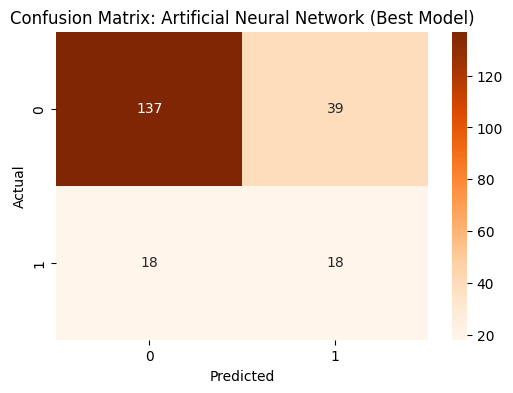

In [59]:
# Hitung Confusion Matrix untuk ANN
# Ganti 'y_pred_ann' dengan nama variabel hasil prediksi model ANN Anda
ann_confusion_matrix = confusion_matrix(y_test, y_pred_ann)

# 2. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(ann_confusion_matrix, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])

plt.title("Confusion Matrix: Artificial Neural Network (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* True negative (kiri atas) : jumlah model berhasil memprediksi output negatif sebesar 137.
* True positive (kanan bawah) : jumlah model berhasil memprediksi output positif sebesar 18.
* False positive (kanan atas) : jumlah model gagal memprediksi output negatif sebesar 39.
* False negative (kiri bawah) : jumlah model gagal memprediksi output positif sebear 18.

Permutation Importance

                 Feature  Importance       Std
7          MonthlyIncome    0.072222  0.039675
6       StockOptionLevel    0.022222  0.029918
0        JobSatisfaction    0.016667  0.048432
10    AvgYearsPerCompany    0.011111  0.028328
3           LoyaltyRatio    0.002778  0.045559
2         JobInvolvement   -0.002778  0.029001
9      TotalWorkingYears   -0.005556  0.034694
5            MonthlyRate   -0.016667  0.028328
4        WorkLifeBalance   -0.022222  0.038889
1   MaritalStatus_Single   -0.033333  0.036851
8                    Age   -0.047222  0.027916


C:\Users\ACER\AppData\Local\Temp\ipykernel_28288\2017310435.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


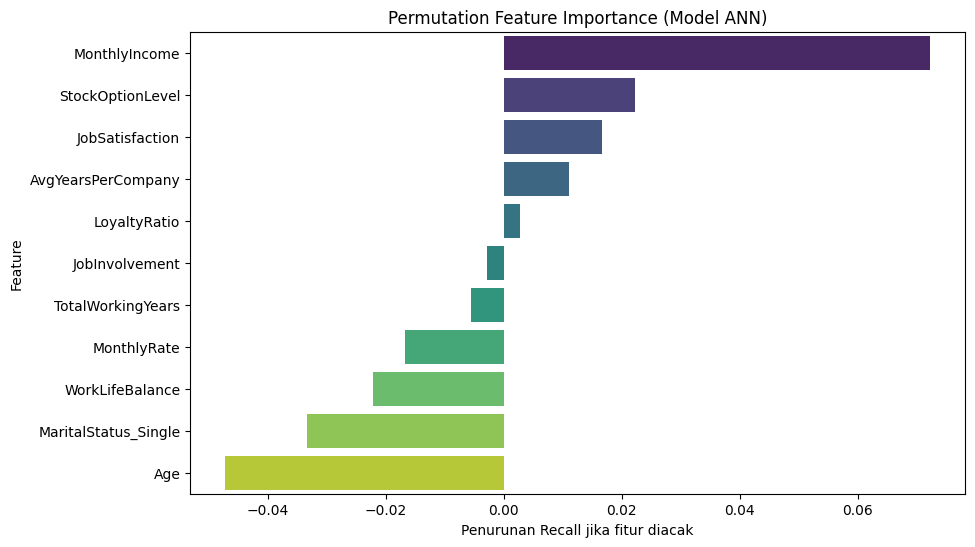

In [62]:
# Permutation Importance untuk Model ANN
# PENTING: Gunakan X_test_scaled (Data yang sudah difilter 11 fitur & discale)
# Scoring kita ganti 'recall' agar konsisten dengan tujuan bisnis (deteksi churn)
results = permutation_importance(ann_model, X_test_scaled, y_test, scoring='recall', n_repeats=10, random_state=42)

# Mapping hasil ke DataFrame agar rapi
# Kita butuh nama fitur asli untuk label grafik
# final_features adalah list nama fitur yang dipilih dari tahap RFE/SelectKBest sebelumnya
feature_importance_df = pd.DataFrame({
    'Feature': final_features,  # Pastikan variabel ini masih ada dari tahap feature selection
    'Importance': results.importances_mean,
    'Std': results.importances_std
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualisasi Permutation Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Permutation Feature Importance (Model ANN)')
plt.xlabel('Penurunan Recall jika fitur diacak')
plt.show()

1. Sang Juara: MonthlyIncome (Gaji Bulanan)
Importance: 0.072 (7.2%)

* Artinya: Ini adalah fitur paling krusial. Ketika data MonthlyIncome diacak , performa Recall model Anda turun sebesar 7.2%.

* Insight Bisnis: Model sangat bergantung pada besaran gaji untuk menentukan seseorang akan keluar atau tidak. Ini konsisten dengan temuan EDA bahwa karyawan dengan gaji rendah lebih rawan resign.

2. Faktor Pendukung: StockOptionLevel & JobSatisfaction
Importance Positif Kecil: Kedua fitur ini membantu model, tapi tidak setinggi Gaji.

Insight Bisnis: Kompensasi saham dan kepuasan kerja adalah sinyal sekunder. Jika gaji sudah aman, baru faktor ini dilihat.

3. Fenomena Aneh: Kenapa Ada Nilai Negatif? (Age, MaritalStatus, WorkLifeBalance)
Anda mungkin bertanya, "Kenapa Age nilainya -0.047? Padahal di EDA Age sangat berpengaruh?"

Dalam Permutation Importance, nilai negatif berarti: "Saat fitur ini diacak, model justru bekerja LEBIH BAIK (atau sama saja)."

Ini bisa terjadi karena 2 alasan:

* Redundansi (Multikolinearitas): Model ANN sudah mendapatkan informasi "Senioritas" dari fitur lain seperti MonthlyIncome atau TotalWorkingYears. Karena Age berkorelasi kuat dengan MonthlyIncome (makin tua makin tinggi gaji), kehadiran Age justru menjadi "sampah" atau noise yang membingungkan model di data Test.

* Overfitting di Training: Model mungkin menghafal pola umur yang spesifik di data Training, tapi pola itu tidak berlaku di data Test. Jadi saat fitur umur dihilangkan/diacak, prediksinya malah jadi lebih umum dan benar.